## Implementing K-Means Clustering Model 

Source: K-means Clustering From Scratch In Python [Machine Learning Tutorial] - DataQuest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [52]:
df = pd.read_csv('../data/audio_cleaned.csv')

In [53]:
df.head()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
0,0,1.0,5.272727,1.004272,1.581922,1.002876,1.002856,1.005677,1.802017,1.160955,...,1.004750,4.485874,2.097500,4.209142,5.087070,9.981928,9.141117,4.055029,2.233992,10.0
1,1,1.0,3.272727,1.489975,1.884802,5.146641,1.009195,1.018088,1.441208,1.009562,...,1.015135,1.009166,1.009338,3.972378,6.827859,9.593373,1.000014,3.925185,3.369162,10.0
2,2,1.0,2.045455,1.034466,1.022792,1.023200,1.022938,1.044994,1.040968,2.514633,...,1.037649,1.022800,3.113880,5.106873,6.267595,8.563251,1.000000,4.166323,2.252010,10.0
3,3,1.0,3.409091,1.666690,1.011586,1.011764,1.011639,1.384053,1.020787,4.935399,...,2.224599,3.069476,1.011819,7.208155,7.699638,1.755411,2.800000,7.978153,7.693622,10.0
4,4,1.0,3.136364,1.014718,1.009766,4.906505,1.009804,1.019279,1.017510,5.431992,...,1.016132,1.628495,1.009956,3.607366,6.818399,9.783132,1.002220,6.373660,4.549379,10.0


In [54]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [55]:
# initialize random centroids 

# defining function random centroids that randomly iterates on each data point to find centroids

# Note: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead centroid = df.apply(lambda x: float(x.sample()))
def random_centroids(df,k):
    centroids = []
    for i in range (k):
        centroid = df.apply(lambda x: float(x.sample()))
        centroids.append(centroid) 
    return pd.concat(centroids, axis = 1)

In [56]:
centroids = random_centroids(df, 5)

centroids

/var/folders/yb/7r1lrc2d02b10hfzy3bjyz_00000gn/T/ipykernel_3990/3264488138.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = df.apply(lambda x: float(x.sample()))


,0,1,2,3,4
release_date,2.826087,7.260870,7.521739,2.304348,4.260870
len,3.227273,3.409091,4.909091,4.227273,7.000000
dating,1.016862,1.010591,1.019559,1.007571,1.451535
violence,2.651820,4.630661,1.429910,1.012959,1.795226
world/life,1.005626,1.008732,1.011764,5.122493,1.006750
night/time,1.019446,1.223258,1.686505,1.004699,1.718107
shake the audience,5.376204,1.007901,2.827311,1.015121,1.113943
family/gospel,1.017510,3.085347,1.015918,1.005696,1.023261
romantic,1.437402,1.008990,1.025258,1.006271,5.499784
communication,3.478776,1.052391,1.010334,1.009049,3.489418


In [57]:
# label each data point from how far each point is from centroid (cluster assignment)

def get_labels(df, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((df - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

labels = get_labels(df,centroids)

labels.value_counts()

2    10791
1     7923
3     7795
4     1682
0      181
Name: count, dtype: int64

In [58]:
# update centroids with geometric mean of clusters 

def new_centroids(df, labels, k):
    centroids = df.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

# repeat until centroids stop updating 

In [59]:
# plot cluster assignments at each iteration 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_clusters(df, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(df)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

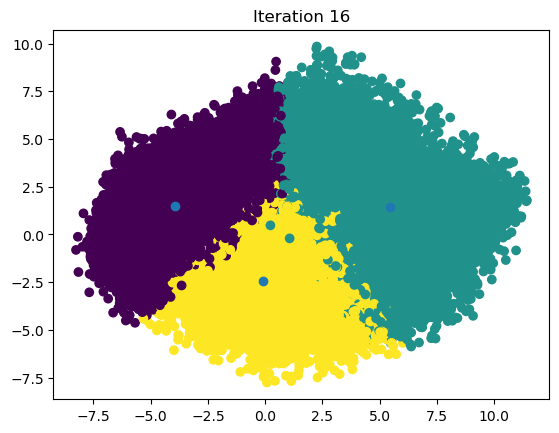

In [60]:
# producing graph that iterates up to 100/until centroids stop updating for 3 clusters 

max_iterations = 100
centroid_count = 3

centroids = random_centroids(df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df, centroids)
    centroids = new_centroids(df, labels, centroid_count)
    plot_clusters(df, labels, centroids, iteration)
    iteration += 1

Needed about 16 iterations before optimal centroids were found 

In [61]:
# interpret cluster assignment

centroids 

,0,1,2
release_date,8.503545,3.866311,4.856574
len,4.477718,3.178073,3.940009
dating,1.162592,1.184660,1.223895
violence,1.876661,1.353572,1.655529
world/life,1.640162,1.803746,1.676778
night/time,1.312914,1.324788,1.377460
shake the audience,1.257729,1.124346,1.223320
family/gospel,1.162855,1.200998,1.198344
romantic,1.174747,1.514657,1.244198
communication,1.664988,1.668889,1.663289


In [62]:
audio_df = pd.read_csv('../data/tcc_ceds_music.csv')

In [63]:
genres = audio_df['genre']

genres = pd.concat([genres, df], axis=1)

genres

,genre,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
0,pop,1.0,5.272727,1.004272,1.581922,1.002876,1.002856,1.005677,1.802017,1.160955,...,1.004750,4.485874,2.097500,4.209142,5.087070,9.981928,9.141117,4.055029,2.233992,10.0
1,pop,1.0,3.272727,1.489975,1.884802,5.146641,1.009195,1.018088,1.441208,1.009562,...,1.015135,1.009166,1.009338,3.972378,6.827859,9.593373,1.000014,3.925185,3.369162,10.0
2,pop,1.0,2.045455,1.034466,1.022792,1.023200,1.022938,1.044994,1.040968,2.514633,...,1.037649,1.022800,3.113880,5.106873,6.267595,8.563251,1.000000,4.166323,2.252010,10.0
3,pop,1.0,3.409091,1.666690,1.011586,1.011764,1.011639,1.384053,1.020787,4.935399,...,2.224599,3.069476,1.011819,7.208155,7.699638,1.755411,2.800000,7.978153,7.693622,10.0
4,pop,1.0,3.136364,1.014718,1.009766,4.906505,1.009804,1.019279,1.017510,5.431992,...,1.016132,1.628495,1.009956,3.607366,6.818399,9.783132,1.002220,6.373660,4.549379,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,hip hop,10.0,4.500000,1.014718,1.009766,1.009907,1.009804,1.019279,1.017510,1.010192,...,1.016132,1.599730,1.009956,9.052943,7.837397,1.562941,1.000000,7.764839,7.261176,1.0
28368,hip hop,10.0,4.000000,1.013803,1.009162,1.327948,1.009195,1.018088,1.016423,1.631952,...,1.613860,1.009166,1.009338,6.981256,8.106223,1.041464,1.000022,9.304411,8.180123,1.0
28369,hip hop,10.0,4.454545,1.016862,2.412293,2.578551,1.011230,1.714509,1.020057,1.336044,...,1.018468,1.011184,1.011404,6.991121,7.542727,1.939749,1.000010,8.543899,7.909845,1.0
28370,hip hop,10.0,4.000000,1.012586,1.008360,1.008472,1.008386,1.870248,1.014977,1.008724,...,2.069123,1.008363,1.008516,8.993752,8.081994,1.063242,1.004541,5.576051,8.972941,1.0


In [64]:
genres[labels ==0]

,genre,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
3032,pop,5.434783,4.181818,1.006878,4.118030,1.004630,1.004589,1.009070,1.008197,1.004795,...,1.007589,1.004596,5.946661,3.390332,6.364741,1.005148,8.812183,1.455379,9.630619,5.565217
3384,pop,5.826087,6.636364,1.012217,7.436216,1.008223,1.362798,1.016022,1.014538,1.008470,...,3.657350,1.008119,1.008267,8.125617,7.598108,1.056193,1.556447,2.265045,5.576438,5.173913
3414,pop,5.826087,1.681818,1.077253,9.201831,1.052000,1.051396,1.100711,1.091794,1.053239,...,1.084270,1.051034,1.052194,1.545544,8.321283,1.012278,4.316751,2.459810,9.972972,5.173913
3423,pop,5.826087,6.909091,1.006717,1.538560,1.792082,2.773676,1.008861,1.008006,1.004684,...,1.007414,1.004490,1.004552,6.083525,7.990847,1.002781,5.934010,1.374691,8.783746,5.173913
3459,pop,5.956522,3.000000,1.012217,2.626117,1.008223,1.008140,1.016022,1.014538,1.817837,...,1.719866,4.266532,1.008267,3.123972,7.133374,1.000128,8.483249,1.536068,9.558545,5.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,hip hop,10.000000,4.500000,1.014718,1.009766,1.009907,1.009804,1.019279,1.017510,1.010192,...,1.016132,1.599730,1.009956,9.052943,7.837397,1.562941,1.000000,7.764839,7.261176,1.000000
28368,hip hop,10.000000,4.000000,1.013803,1.009162,1.327948,1.009195,1.018088,1.016423,1.631952,...,1.613860,1.009166,1.009338,6.981256,8.106223,1.041464,1.000022,9.304411,8.180123,1.000000
28369,hip hop,10.000000,4.454545,1.016862,2.412293,2.578551,1.011230,1.714509,1.020057,1.336044,...,1.018468,1.011184,1.011404,6.991121,7.542727,1.939749,1.000010,8.543899,7.909845,1.000000
28370,hip hop,10.000000,4.000000,1.012586,1.008360,1.008472,1.008386,1.870248,1.014977,1.008724,...,2.069123,1.008363,1.008516,8.993752,8.081994,1.063242,1.004541,5.576051,8.972941,1.000000


Cluster 0 = high energy and loudness, associated with the genres of hip hop and pop 

In [65]:
genres[labels ==1]

,genre,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
0,pop,1.000000,5.272727,1.004272,1.581922,1.002876,1.002856,1.005677,1.802017,1.160955,...,1.004750,4.485874,2.097500,4.209142,5.087070,9.981928,9.141117,4.055029,2.233992,10.000000
1,pop,1.000000,3.272727,1.489975,1.884802,5.146641,1.009195,1.018088,1.441208,1.009562,...,1.015135,1.009166,1.009338,3.972378,6.827859,9.593373,1.000014,3.925185,3.369162,10.000000
2,pop,1.000000,2.045455,1.034466,1.022792,1.023200,1.022938,1.044994,1.040968,2.514633,...,1.037649,1.022800,3.113880,5.106873,6.267595,8.563251,1.000000,4.166323,2.252010,10.000000
4,pop,1.000000,3.136364,1.014718,1.009766,4.906505,1.009804,1.019279,1.017510,5.431992,...,1.016132,1.628495,1.009956,3.607366,6.818399,9.783132,1.002220,6.373660,4.549379,10.000000
5,pop,1.000000,5.409091,1.010591,4.854930,1.007129,1.682253,1.013905,1.012607,1.007351,...,1.011635,2.174212,1.007168,7.227886,7.170295,9.087348,1.000000,7.913232,5.945819,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27343,rock,9.869565,3.500000,1.012586,1.008360,4.911154,1.008386,1.016503,1.627858,1.008724,...,1.013809,1.008363,1.008516,5.323907,6.822783,8.996987,1.032802,3.934460,3.792599,1.130435
27401,rock,10.000000,2.818182,1.022088,1.014627,1.014868,1.428897,1.028877,1.026265,1.015265,...,1.024163,6.228085,1.014934,5.708648,6.535959,9.584337,7.395939,2.385614,3.846655,1.000000
27409,rock,10.000000,2.000000,1.044735,5.437754,1.030112,1.029768,1.058366,1.053166,1.914724,...,1.048838,1.029576,1.030230,5.175929,6.809399,9.674698,1.000163,3.396538,3.225014,1.000000
27485,hip hop,6.478261,1.590909,1.077253,1.051015,1.052000,1.051396,3.254582,1.091794,1.053239,...,1.084270,1.051034,1.052194,7.592897,6.256057,6.602405,1.001032,5.344188,3.837645,4.521739


Cluster 1 = low energy, associated with the genres of rock

In [66]:
# implementing k means model from sklearn
kmeans = KMeans(3)
kmeans.fit(df)

/Users/nasehacho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [75]:
audio_2 = audio_df.drop(['Unnamed: 0','lyrics', 'artist_name','track_name','genre','topic'], axis = 1)

audio_2


,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
0,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,...,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,1.000000
1,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,...,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,1.000000
2,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,...,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,1.000000
3,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,...,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,1.000000
4,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,...,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,0.014286
28368,2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,0.066324,0.203889,...,0.040811,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,0.014286
28369,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,0.035401,0.001504,...,0.001504,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,0.014286
28370,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,0.001196,0.001196,...,0.070867,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,0.014286


Text(0, 0.5, 'Euclidean Distance to Centroid')

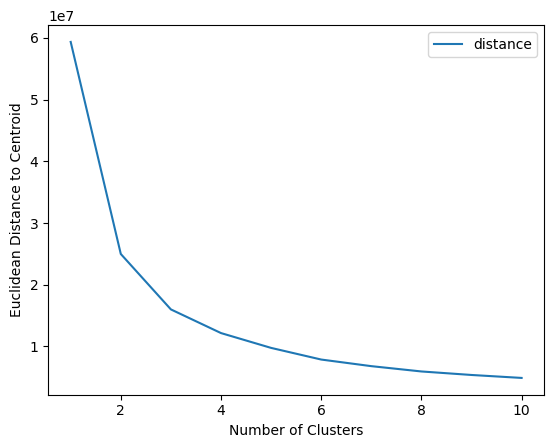

In [80]:
# implementing elbow method (sum of squares distance) to determine official optimal number of clusters 

Elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(audio_2)
    Elbow.append([i, kmeans.inertia_])
Elbow = pd.DataFrame(Elbow, columns=['number_of_clusters', 'distance'])
Elbow.set_index("number_of_clusters").plot()
plt.xlabel("Number of Clusters")
plt.ylabel("Euclidean Distance to Centroid")

Optimal Amount of Clusters: 3 

In [81]:
kmeans = KMeans(3)
audio_2['Cluster'] = kmeans.fit_predict(audio_2)


/Users/nasehacho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [82]:
audio_2

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age,Cluster
0,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,1.000000,2
1,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,1.000000,1
2,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,1.000000,1
3,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,1.000000,1
4,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,0.014286,2
28368,2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,0.066324,0.203889,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,0.014286,2
28369,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,0.035401,0.001504,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,0.014286,2
28370,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,0.014286,2
